In [ ]:
def prep_images(filename,img_shape=224,scale=True):
    img=tf.io.read(filename)
    #Decode img to tensor
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,[img_shape,img_shape])

    if scale:
        return img/225.
    else:
        return img

In [ ]:
import os
def walk_through_dir(dir_path):
    
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")


In [ ]:
import zipfile
def unzipfile(filename):
    zipref=zipfile(filename,'r')
    zipref.extractall()
    zipref.close()

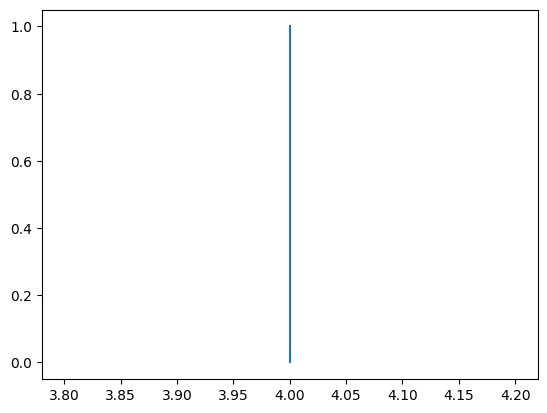

In [9]:
import matplotlib.pyplot as plt
initial_epochs=5    
plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir='10_food_classes_10_percent/train/'
test_dir='10_food_classes_10_percent/test/'

train_datagen=ImageDataGenerator(rescale=1/225.)
test_datagen=ImageDataGenerator(rescale=1/225.)

train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical')

test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical')


##############################################################################################################################


train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=(224,224),batch_size=32,label_mode='catagorical')

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(224,224),label_mode='categorical')

ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
def create_tensoboard_callback(dir_name,experiment_name):
    log_dir=dir_name+"/"+experiment_name+"/"+datatime.datetime.now().strftime("%Y%m%d"-%H%M%S)
    tensorboard_callback=tf.keras.callbacks.Tensorboard(
        log_dir=log_dir
    )
    print('File is store in this directory {log_dir}')

    return tensorboard_callback

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "Efficient"
--description "Comparing Two Different"
--one_shot 

In [ ]:
train_data.classnames

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('Horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
],name="Data_Argumentation")

input_shape=(224,224,3)

base_model=tf.keras.applications.efficientNetV2B7(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=input_shape,name='Input_layers')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_1=tf.keras.Model(inputs,outputs)



In [ ]:
checkpoint_path='ten_percent_model_checkpoints/checkpoint.ckpt'

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=True,save_freq='epoch',verbose=1)

In [18]:
import numpy as np

arr = np.array([
    [0.1, 0.7, 0.2],
    [0.9, 0.05, 0.05],
    [0.6, 0.3, 0.8]
])

In [19]:
np.argmax(arr, axis=1)


array([1, 0, 2], dtype=int64)

In [21]:
np.max(arr, axis=0)


array([0.9, 0.7, 0.8])